# [1] Read Data

In [ ]:
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#ignore warnings
warnings.filterwarnings('ignore')

# Open the data
df = pd.read_csv("/content/winequality-red.csv")

# [2] EDA (Exploratory Data Analysis)

In [ ]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

print(df.info())
print('-'*30)
print(df.columns)
print('-'*30)
print(df.head())
print('-'*30)
print(df.describe())

In [ ]:
print('Empty cells in data')
print(df.isnull().sum())

In [ ]:
# create a distribution plot of quality
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Quality Distribution Plot',fontsize=23)
sns.distplot(df['quality'], color='skyblue')

In [ ]:
# create correlation matrix
mask = np.zeros_like(df[columns].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=23)

sns.heatmap(df[columns].corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

# most correlating columns
features = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']

# [3] Normalization

In [ ]:
# Normalizing over the standard deviation
df_dropped = df.drop('quality', axis=1)
X =df_dropped.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

# [4] Train Model

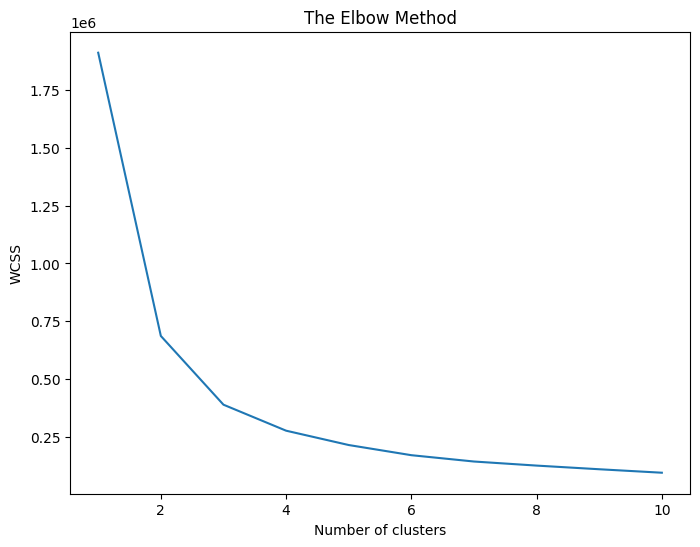

In [ ]:
# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# build the model with the output from elbow method which is 2
clusterNum = 3
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 0 ... 0 0 0]


# [5] Model Analysis

In [ ]:
# We assign the labels to each row in dataframe.
df_dropped['Clus_km'] = labels
print(df_dropped.head())

print(df_dropped.groupby('Clus_km').mean())

Text(0, 0.5, 'total sulfur dioxide')

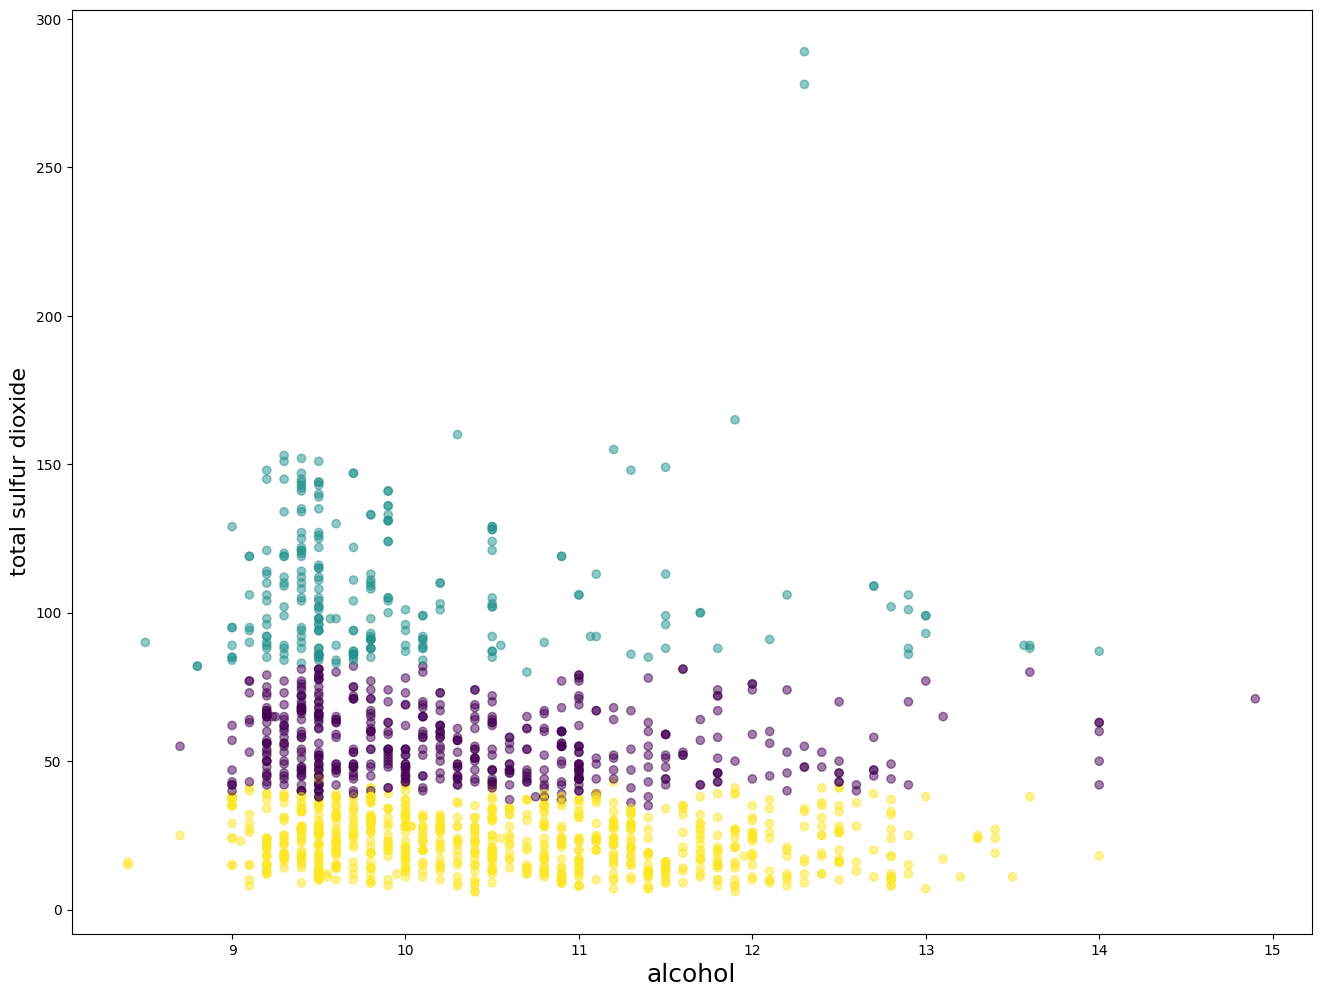

In [ ]:
# create 2 dimensional graph
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 9], X[:, 5], c=labels.astype(float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

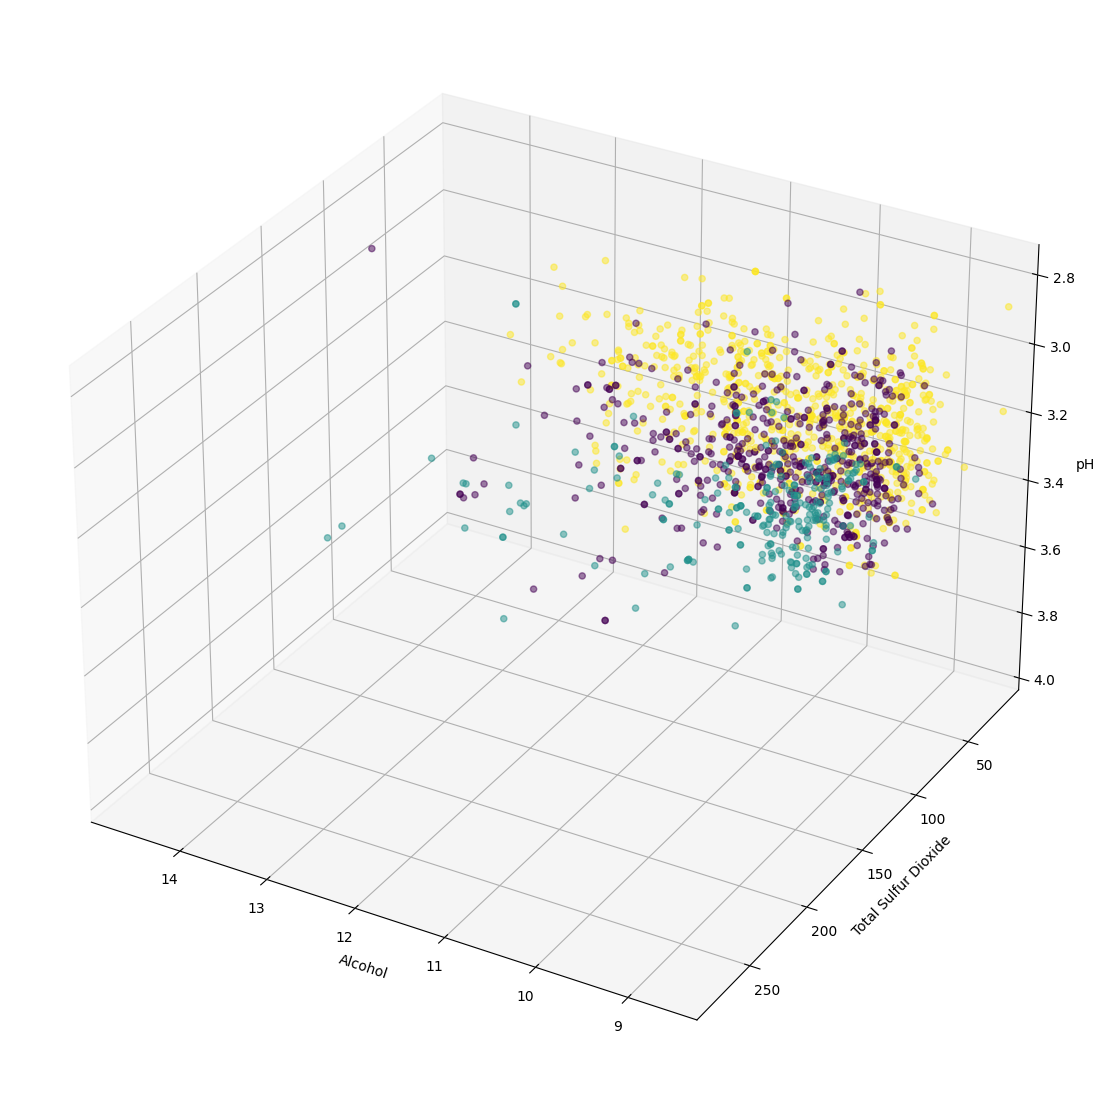

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and axis for a 3D plot
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot data
scatter = ax.scatter(X[:, 9], X[:, 5], X[:, 7], c=labels.astype(float), alpha=0.5)

# Set labels
ax.set_xlabel('Alcohol')
ax.set_ylabel('Total Sulfur Dioxide')
ax.set_zlabel('pH')

ax.set_xlim(max(X[:, 9]), min(X[:, 9]))
ax.set_ylim(max(X[:, 5]), min(X[:, 5]))
ax.set_zlim(max(X[:, 7]), min(X[:, 7]))

# Show the plot
plt.show()

# [6] Promotion: Mini Batch Kmeans

[0 1 0 ... 0 0 0]
K-means elapsed time: 0.507408857345581
Mini Batch K-means elapsed time: 0.08860659599304199


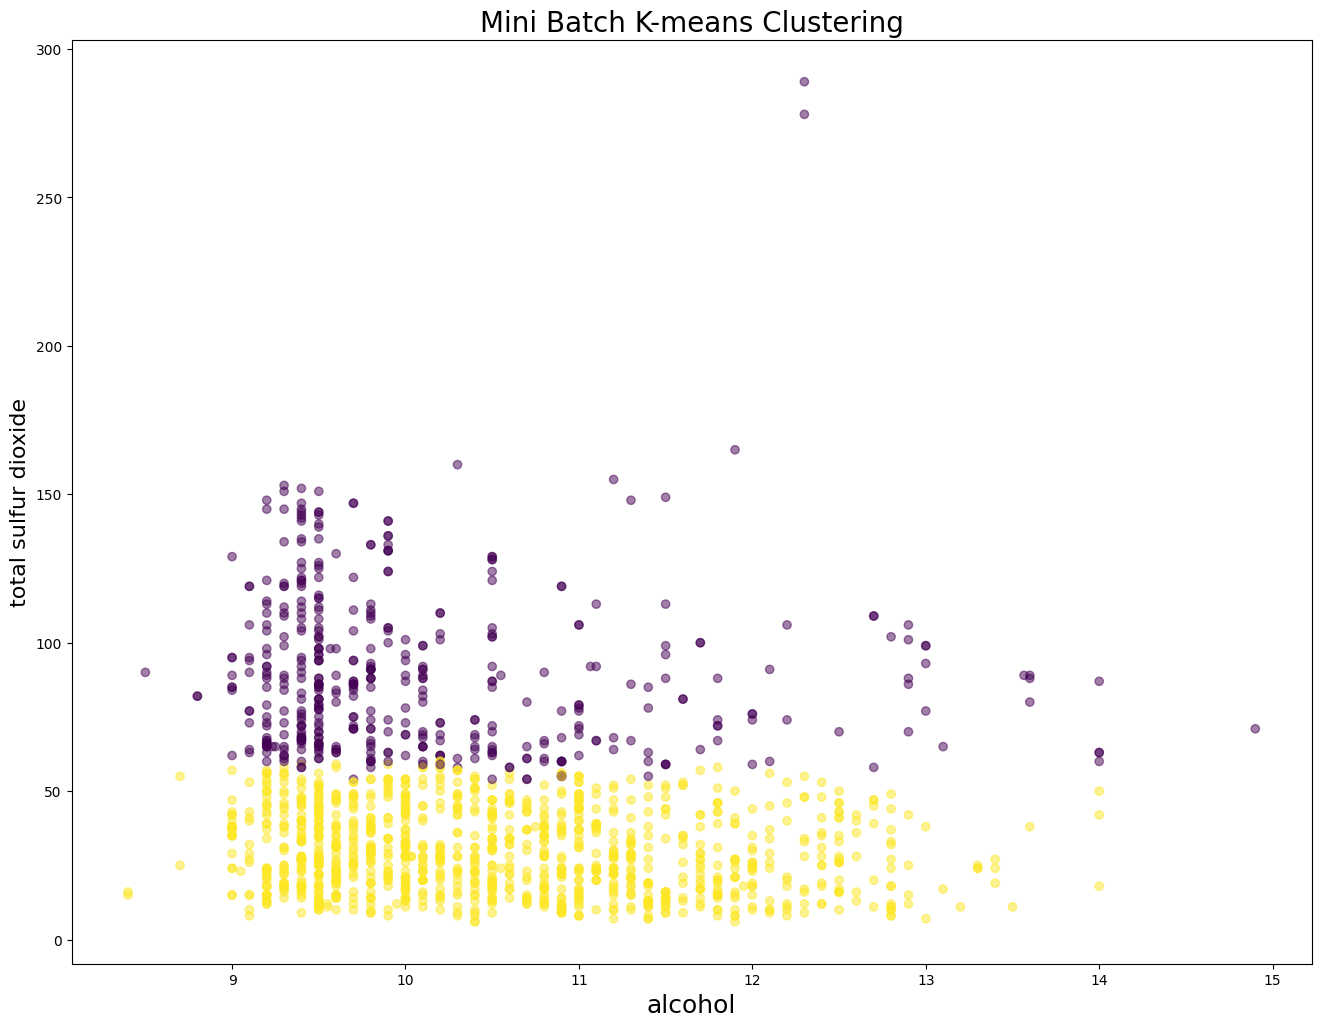

In [ ]:
import time
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, SpectralClustering

start_time = time.time()
# Build the model with the output from the elbow method which is 2
clusterNum = 2
k_means = KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)
k_means_elapsed_time = time.time() - start_time

# K-means Mini Batch Model Creation
start_time = time.time()
k_means_mini_batch = MiniBatchKMeans(init='k-means++', n_clusters=clusterNum, batch_size=32, n_init=12)
k_means_mini_batch.fit(X)
labels_mini_batch = k_means_mini_batch.labels_
k_means_mini_batch_elapsed_time = time.time() - start_time


print("K-means elapsed time:", k_means_elapsed_time)
print("Mini Batch K-means elapsed time:", k_means_mini_batch_elapsed_time)

# Create a scatter plot for Mini Batch K-means clustering
f4, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 9], X[:, 5], c=labels_mini_batch.astype(float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)
plt.title('Mini Batch K-means Clustering', fontsize=20)
plt.show()